## Analysing Lyft Data in 2014

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('Lyft2014.csv')

In [4]:
df.head()

,time_of_trip,start_lat,start_lng,Unnamed: 3
0,9/4/2014 9:51,40.64705,-73.77988,NaN
1,8/27/2014 21:13,40.74916,-73.98373,NaN
2,9/4/2014 14:16,40.64065,-73.97594,NaN
3,9/4/2014 16:08,40.75002,-73.99514,NaN
4,8/28/2014 2:41,40.76715,-73.98636,NaN


In [5]:
df['time_of_trip'] = pd.to_datetime(df['time_of_trip'])

In [6]:
df['day'] = df['time_of_trip'].dt.day
df['month'] = df['time_of_trip'].dt.month
df['year'] = df['time_of_trip'].dt.year
df['time'] = df['time_of_trip'].dt.time

In [7]:
df.head()

,time_of_trip,start_lat,start_lng,Unnamed: 3,day,month,year,time
0,2014-09-04 09:51:00,40.64705,-73.77988,NaN,4,9,2014,09:51:00
1,2014-08-27 21:13:00,40.74916,-73.98373,NaN,27,8,2014,21:13:00
2,2014-09-04 14:16:00,40.64065,-73.97594,NaN,4,9,2014,14:16:00
3,2014-09-04 16:08:00,40.75002,-73.99514,NaN,4,9,2014,16:08:00
4,2014-08-28 02:41:00,40.76715,-73.98636,NaN,28,8,2014,02:41:00


In [8]:
df.drop(columns='time_of_trip',inplace=True)

In [9]:
df.head()

,start_lat,start_lng,Unnamed: 3,day,month,year,time
0,40.64705,-73.77988,NaN,4,9,2014,09:51:00
1,40.74916,-73.98373,NaN,27,8,2014,21:13:00
2,40.64065,-73.97594,NaN,4,9,2014,14:16:00
3,40.75002,-73.99514,NaN,4,9,2014,16:08:00
4,40.76715,-73.98636,NaN,28,8,2014,02:41:00


In [10]:
df.drop(columns='Unnamed: 3', inplace=True)

In [11]:
df.head()

,start_lat,start_lng,day,month,year,time
0,40.64705,-73.77988,4,9,2014,09:51:00
1,40.74916,-73.98373,27,8,2014,21:13:00
2,40.64065,-73.97594,4,9,2014,14:16:00
3,40.75002,-73.99514,4,9,2014,16:08:00
4,40.76715,-73.98636,28,8,2014,02:41:00


In [14]:
df['month'].value_counts()

month
8    147448
9    115999
7      4254
Name: count, dtype: int64

In [15]:
Ljul14 = df[df['month'] == 7]['day'].value_counts().to_dict()
Laug14 = df[df['month'] == 8]['day'].value_counts().to_dict()
Lsep14 = df[df['month'] == 9]['day'].value_counts().to_dict()

In [27]:
Lmid = []
Lavg = []

In [19]:
Ljul14 = dict(sorted(Ljul14.items()))
Laug14 = dict(sorted(Laug14.items()))
Lsep14 = dict(sorted(Lsep14.items()))

In [28]:
avg = np.mean(list(Ljul14.values()))
Lavg.append(avg)
avg = np.mean(list(Laug14.values()))
Lavg.append(avg)
avg = np.mean(list(Lsep14.values()))
Lavg.append(avg)

In [29]:
mid = np.median(list(Ljul14.values()))
Lmid.append(mid)
mid = np.median(list(Laug14.values()))
Lmid.append(mid)
mid = np.median(list(Lsep14.values()))
Lmid.append(mid)

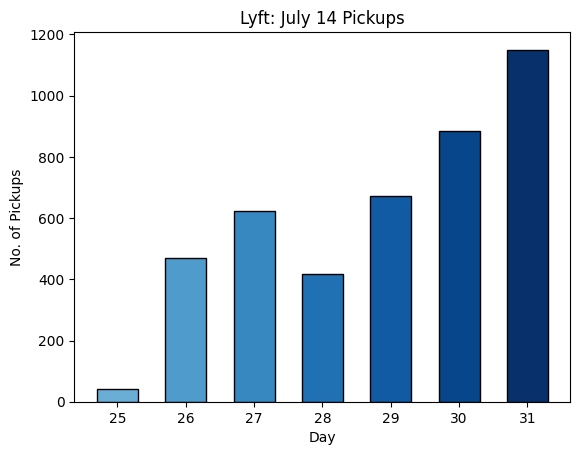

In [24]:
x,y = [] , []
for i,j in Ljul14.items():
    x.append(i)
    y.append(j)

plt.title('Lyft: July 14 Pickups')
plt.ylabel('No. of Pickups')
plt.xlabel('Day')
plt.bar(x, y, edgecolor='black', color=plt.cm.Blues(np.linspace(0.5, 1, len(x))), width=0.6)
plt.show()

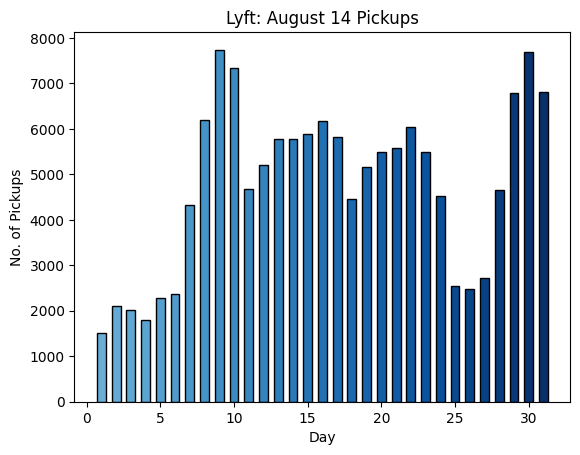

In [25]:
x,y = [] , []
for i,j in Laug14.items():
    x.append(i)
    y.append(j)

plt.title('Lyft: August 14 Pickups')
plt.ylabel('No. of Pickups')
plt.xlabel('Day')
plt.bar(x, y, edgecolor='black', color=plt.cm.Blues(np.linspace(0.5, 1, len(x))), width=0.6)
plt.show()

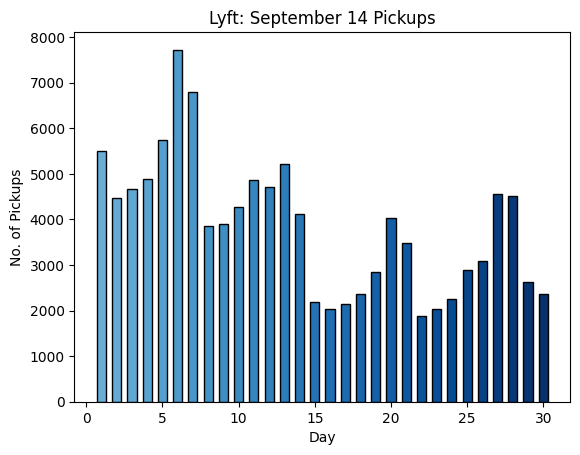

In [26]:
x,y = [] , []
for i,j in Lsep14.items():
    x.append(i)
    y.append(j)

plt.title('Lyft: September 14 Pickups')
plt.ylabel('No. of Pickups')
plt.xlabel('Day')
plt.bar(x, y, edgecolor='black', color=plt.cm.Blues(np.linspace(0.5, 1, len(x))), width=0.6)
plt.show()

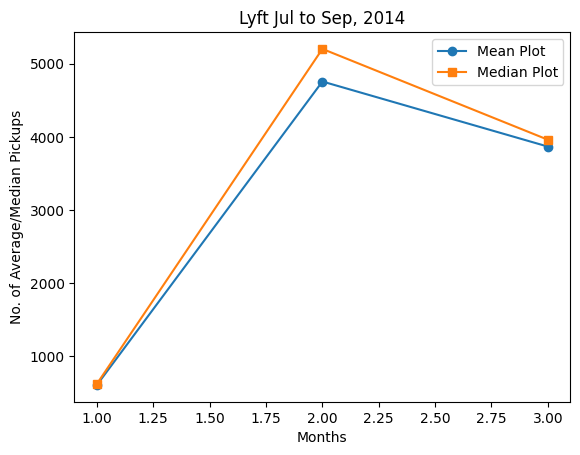

In [30]:
x1,y1 = [1,2,3] , Lavg
x2,y2 = [1,2,3], Lmid

plt.title('Lyft Jul to Sep, 2014')
plt.ylabel('No. of Average/Median Pickups')
plt.xlabel('Months')
plt.plot(x1,y1,'o-',label='Mean Plot')
plt.plot(x2,y2,'s-',label='Median Plot')
plt.legend()
plt.show()